<a href="https://colab.research.google.com/github/Remonah-3/Github_Assignment/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Decision Tree (max_depth=1) Metrics
Accuracy: 0.9666666666666667
Precision: 0.9333333333333333
Recall: 1.0


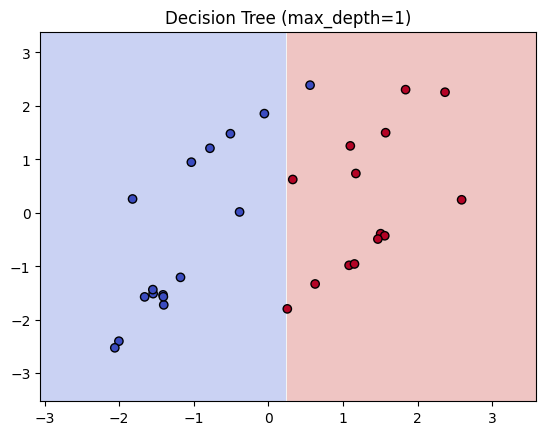


Decision Tree (max_depth=2) Metrics
Accuracy: 0.9666666666666667
Precision: 0.9333333333333333
Recall: 1.0


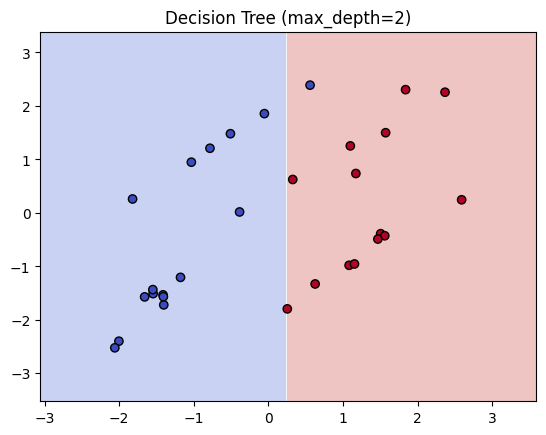


Decision Tree (max_depth=None) Metrics
Accuracy: 0.9666666666666667
Precision: 0.9333333333333333
Recall: 1.0


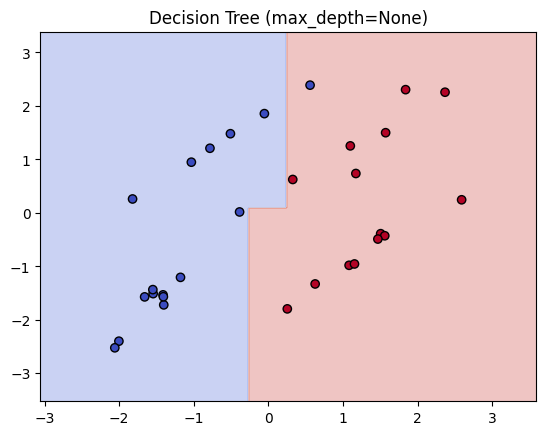

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Gini impurity function

def gini(y):
    # Count the number of samples in each class
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    # Gini formula: 1 - sum of squared probabilities
    return 1 - np.sum(probs ** 2)


# Information gain function

def info_gain(parent, left, right):
    n = len(parent)
    return gini(parent) - (len(left)/n)*gini(left) - (len(right)/n)*gini(right)


# Scratch Decision Tree

class SimpleDecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None  # Will store the tree structure

    # Fit the tree to the data
    def fit(self, X, y):
        self.tree = self._build(X, y, depth=0)

    # Recursive function to build the tree
    def _build(self, X, y, depth):
        # Stop if all same class or max depth reached
        if len(np.unique(y)) == 1 or (self.max_depth is not None and depth == self.max_depth):
            return {'is_leaf': True, 'class': np.bincount(y).argmax()}

        best_ig = -1
        best_feat = None
        best_thresh = None

        # Try every feature and threshold
        for f in range(X.shape[1]):
            thresholds = np.unique(X[:, f])
            for t in thresholds:
                left = y[X[:, f] < t]
                right = y[X[:, f] >= t]
                if len(left) == 0 or len(right) == 0:
                    continue
                ig = info_gain(y, left, right)
                if ig > best_ig:
                    best_ig = ig
                    best_feat = f
                    best_thresh = t

        if best_feat is None:
            return {'is_leaf': True, 'class': np.bincount(y).argmax()}

        # Split the data
        left_idx = X[:, best_feat] < best_thresh
        right_idx = X[:, best_feat] >= best_thresh

        # Build child nodes
        left_tree = self._build(X[left_idx], y[left_idx], depth+1)
        right_tree = self._build(X[right_idx], y[right_idx], depth+1)

        return {
            'is_leaf': False,
            'feature': best_feat,
            'threshold': best_thresh,
            'left': left_tree,
            'right': right_tree
        }

    # Predict for one sample
    def _predict_one(self, x, tree):
        if tree['is_leaf']:
            return tree['class']
        if x[tree['feature']] < tree['threshold']:
            return self._predict_one(x, tree['left'])
        else:
            return self._predict_one(x, tree['right'])

    # Predict for multiple samples
    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for x in X])


# Decision regions visualization

def plot_regions(X, y, model, title="Decision Tree"):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.show()

# Example

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train trees with different depths
for d in [1, 2, None]:
    tree = SimpleDecisionTree(max_depth=d)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    print(f"\nDecision Tree (max_depth={d}) Metrics")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    plot_regions(X_test, y_test, tree, f"Decision Tree (max_depth={d})")
